<a href="https://colab.research.google.com/github/sravanibandreddy/natural-language-processing/blob/main/nlp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                Method  Execution Time (s)  Accuracy (Change Ratio)  \
0   WordNet Lemmatizer              0.0003                   0.2308   
1     Spacy Lemmatizer              0.0325                   0.6667   
2  TextBlob Lemmatizer              0.0003                   0.2308   

                                       Sample Output  
0  The striped bat are hanging on their foot for ...  
1  the striped bat be hang on their foot for good...  
2  The striped bat are hanging on their foot for ...  


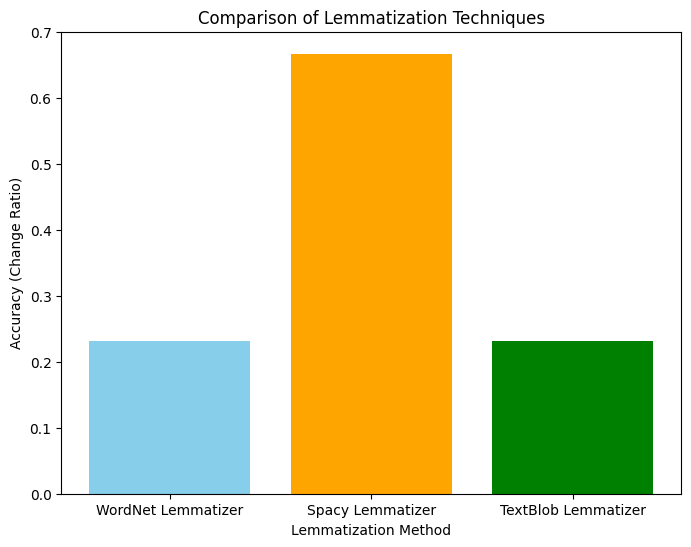

In [7]:
#various lemmatization techniques

import nltk
import spacy
from textblob import Word
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
from time import time

# Download necessary resources
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

# Load spacy model
nlp = spacy.load("en_core_web_sm")

# Sample dataset (sentences with different forms of words)
sentences = [
    "The striped bats are hanging on their feet for best",
    "The children are playing with toys",
    "She is running and was thinking about the results",
    "The cars are driven on the roads",
    "He studies hard and is studying now"
]

# Preprocess sentences into tokens
tokens = [word for sentence in sentences for word in nltk.word_tokenize(sentence)]

# --- 1. WordNet Lemmatizer ---
def wordnet_lemmatizer(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# --- 2. Spacy Lemmatizer ---
def spacy_lemmatizer(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

# --- 3. TextBlob Lemmatizer ---
def textblob_lemmatizer(tokens):
    return [Word(word).lemmatize() for word in tokens]

# Performance evaluation
def evaluate_lemmatizer(method_name, lemmatizer_func):
    start = time()
    lemmatized_tokens = lemmatizer_func(tokens)
    end = time()

    # Accuracy: proportion of words that were changed meaningfully (heuristic)
    changed = sum([1 for i, j in zip(tokens, lemmatized_tokens) if i != j])
    accuracy = changed / len(tokens)

    return {
        "Method": method_name,
        "Execution Time (s)": round(end - start, 4),
        "Accuracy (Change Ratio)": round(accuracy, 4),
        "Sample Output": " ".join(lemmatized_tokens)
    }

# Run evaluations
results = []
results.append(evaluate_lemmatizer("WordNet Lemmatizer", wordnet_lemmatizer))
results.append(evaluate_lemmatizer("Spacy Lemmatizer", spacy_lemmatizer))
results.append(evaluate_lemmatizer("TextBlob Lemmatizer", textblob_lemmatizer))

# Convert results to dataframe
df = pd.DataFrame(results)
print(df)

# Plot chart
plt.figure(figsize=(8, 6))
plt.bar(df['Method'], df['Accuracy (Change Ratio)'], color=['skyblue', 'orange', 'green'])
plt.xlabel("Lemmatization Method")
plt.ylabel("Accuracy (Change Ratio)")
plt.title("Comparison of Lemmatization Techniques")
plt.show()